## Phase 2: Prediction of Total Yeild Energy

## Table of Contents
1. **Introduction** <br>
    1.1. Phase 1 Summary <br>
    1.2. Report Overview <br>
    1.3. Overview of Methodology <br>
2. **Predictive Modelling** <br>
    2.1. Feature Selection <br>
    2.2. Model Fitting and Tuning along with Hyperparameter tuning <br>
    2.3. Model Comparision <br>
3. **Critique and Limitations**<br>
4. **Summary and Conclusions** <br>
    4.1. Summary For Both Phases Of The Project <br>
    4.2. Summary of Findings<br>
    4.3. Conclusion <br>
5. **References**

## 1. Introduction

### 1.1 Phase 1 Summary
In this project we will be predicting the total yeild energy of a gas turbine system using some specific parameters. The dataset used for this project was taken from the UCI machine learning repository (Heysem Kaya, 2022). It contains various measurements taken from different sensors located in a gas turbine in Turkey to study the emissions of carbon monoxide and nitrogen oxides. The recordings in the datset were taken in the year 2015. In the Phase 1 of this project, all the cleaning and basic pre processing of the dataset was done. It included removal of null values, fixing a target variable for prediction, checking all the data types, and more. Data preprocessing is an important step towards any machine learning problem as it enables us to get accurate results. This project is a regression problem and therefore we would be using Linear Regression, Random Forest, and Decision Tree algorithms to predict our target feature.

### 1.2 Report Overview
This report predominantly deals with predictive modelling and fine tuning the hyper parameters for more accurate predictions of teh target variable. The total dataset has around 7000 rows. Since it is very large and the model fitting takes time and resources, we would be using only 5000 rows for all our analysis. We start by reading the dataset and checking for any null values that might be present. Further, we scale all the features using MinMaxScaler. This preserves the shape of the original distribution and brings all the values between 0 and 1. Next, we make 3 predictive models: Linear Regression, Random Foreest Regressor, and Decision Tree Regressor algorithms followed by the fine tuning of the hyperparameters to obtain suitable results.

### 1.3 Overview of Methodology
Powerful algorithms require hyperparameter tuning too to make better use of them. In this project, for Random Forest algorithm, we check the results before and after tuning. We use the number of estimators, max_depth, min_sample_split, and number of features for the hyperparameter tuning. Similarly for Decision Tree algoritm, we use the max_depth, min_sample_split, and number of features for the hyperparameter tuning. We use the KFold for both Random Forest and Decision Tree algorithms. Shuffling is also enabled so that consistent results can be obtained. For the Linear Regression mode, it is quite simply putting the data and obtaining a score that can evaluate the model properly and accurately.

## 2. Predictive Modelling

In [8]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-v0_8")


In [9]:
#loading the dataset and checking the head of the same to see if it has been loaded in properly
GT_emissions = pd.read_csv("Phase2_Group91.csv")
GT_emissions.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [10]:
#Checking for null values
## No null values found, can procedd to the next step
GT_emissions.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [11]:
# Summary statistics
GT_emissions.describe(include='all')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


In [12]:
GT_emissions.sample(5, random_state=999)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
1649,8.2797,1008.3,84.191,2.6276,18.669,1045.4,549.85,109.40,10.198,5.8329,71.070
7085,10.9830,1025.9,61.541,3.3500,23.490,1076.8,550.10,131.20,11.842,3.3611,61.628
4366,29.0900,1011.3,51.661,4.4860,30.552,1100.0,542.88,149.34,13.369,1.8529,54.393
4047,21.5400,1007.8,89.686,4.3392,29.926,1100.0,545.17,148.52,13.146,1.1483,55.930
6398,16.0720,1016.1,71.225,3.2991,23.509,1074.7,550.21,128.39,11.726,2.2579,54.790


### Scaling all the features

In [14]:
from sklearn import preprocessing

Data_df = GT_emissions.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(GT_emissions)
Data = Data_scaler.fit_transform(GT_emissions)

In [15]:
pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
1649,0.334915,0.400424,0.828123,0.090152,0.042184,0.348341,0.978582,0.118017,0.061874,0.137464,0.481632
7085,0.397293,0.773305,0.516058,0.341798,0.251629,0.720379,0.985818,0.392300,0.372754,0.077005,0.380944
4366,0.815104,0.463983,0.379934,0.737520,0.558433,0.995261,0.776845,0.620533,0.661511,0.040116,0.303791
4047,0.640891,0.389831,0.903832,0.686383,0.531236,0.995261,0.843126,0.610216,0.619341,0.022882,0.320181
6398,0.514719,0.565678,0.649481,0.324067,0.252455,0.695498,0.989001,0.356945,0.350819,0.050022,0.308025


### 2.1 Feature Selection
For our feature seelction, we first drop the target variable and make a copy of the dataset. RandomForestRegressor from sklean.ensemble is then used to check the best features that might be affecting our final target variable. A table is made explaining all the featuers to make it easier to understand the results.

In [17]:
## Feature selection and ranking
Data = Data_df.drop('TEY',axis =1)
target = GT_emissions['TEY']

In [18]:
from sklearn.ensemble import RandomForestRegressor



model_rfi = RandomForestRegressor(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1]

best_features_rfi = Data.columns[fs_indices_rfi].values
best_features_rfi

array(['CDP', 'TIT', 'AT', 'AFDP', 'TAT', 'GTEP', 'NOX', 'AP', 'AH', 'CO'],
      dtype=object)

In [19]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([9.56660503e-01, 2.91427162e-02, 9.13920838e-03, 1.67558662e-03,
       1.47039652e-03, 7.78541958e-04, 3.96859641e-04, 3.31373663e-04,
       2.38239033e-04, 1.66574805e-04])

In [20]:
# Visualising the above results
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

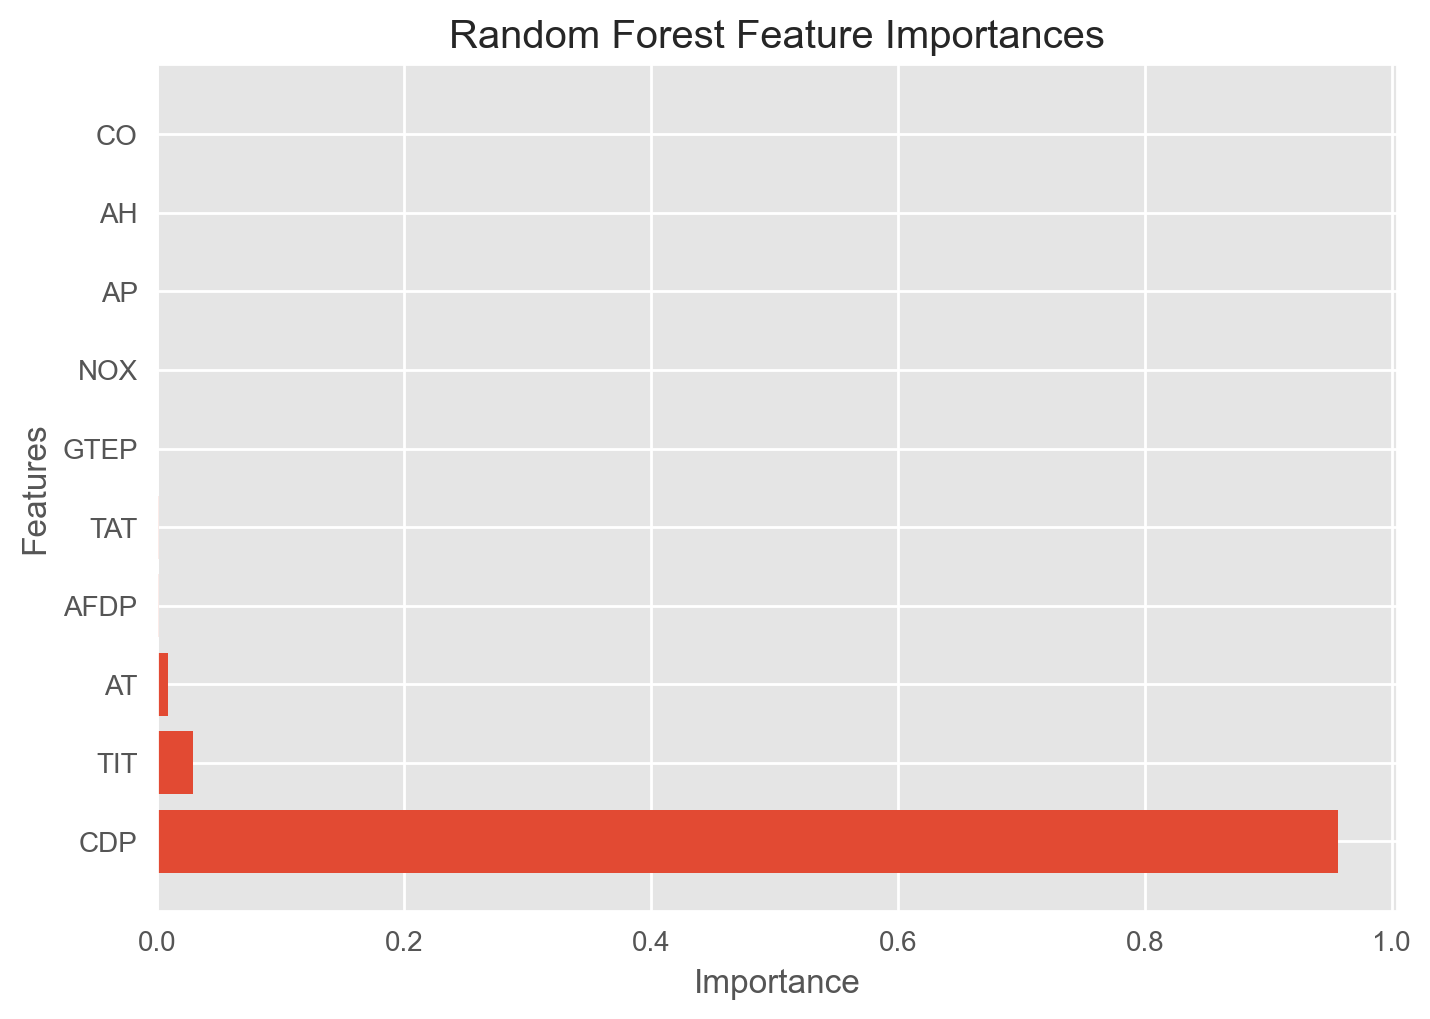

In [21]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

In [22]:
#Tabulating the dataset
from tabulate import tabulate

table = [['Name', 'Description', 'Units'],
        ['AT', 'Ambient Temperature','Celsius'],
        ['AP', 'Ambient Pressure','mbar'],
        ['AH', 'Ambient Humidity', '%'],
        ['AFDP', 'Air Filter Difference Pressure', 'mbar'],
        ['GTEP', 'Gas Turbine Exhaust Pressure', 'mbar'],
        ['TIT', 'Turbine Inlet temperature', 'Celsius'],
        ['TAT', 'Turbine After temperature', 'Celsius'],
        ['TEY', 'Turbine Energy Yield', 'Megawatt hour (MWH)'],
        ['CDP', 'Compressor Discharge Pressure', 'mbar'],
        ['CO', 'Carbon monoxide content','mg/m3'],
        ['NOX', 'Nitrogen oxides content', 'mg/mg3']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤════════════════════════════════╤═════════════════════╕
│ Name   │ Description                    │ Units               │
╞════════╪════════════════════════════════╪═════════════════════╡
│ AT     │ Ambient Temperature            │ Celsius             │
├────────┼────────────────────────────────┼─────────────────────┤
│ AP     │ Ambient Pressure               │ mbar                │
├────────┼────────────────────────────────┼─────────────────────┤
│ AH     │ Ambient Humidity               │ %                   │
├────────┼────────────────────────────────┼─────────────────────┤
│ AFDP   │ Air Filter Difference Pressure │ mbar                │
├────────┼────────────────────────────────┼─────────────────────┤
│ GTEP   │ Gas Turbine Exhaust Pressure   │ mbar                │
├────────┼────────────────────────────────┼─────────────────────┤
│ TIT    │ Turbine Inlet temperature      │ Celsius             │
├────────┼────────────────────────────────┼─────────────────────┤
│ TAT    │

We can see that CDP, TIT, and AT are of most important features.

### 2.2 Model Fitting and Tuning along with Hyperparameter tuning
Since our problem is regression based, we are using Linear Regression, Random Forest algorithm, and Decision Trees algorithm followed by fine tuning their respective parameters for a more accurate result. We will be using 5000 rows out of the total dataset to train and test the models and evaluate their performance.

In [25]:
n_samples = 5000

Data_sample = pd.DataFrame(Data).sample(n=n_samples, random_state=8).values
target_sample = pd.DataFrame(target).sample(n=n_samples, random_state=8).values

print(Data_sample.shape)
print(target_sample.shape)

(5000, 10)
(5000, 1)


In [26]:
from sklearn.model_selection import train_test_split

Data_sample_train, Data_sample_test, \
target_sample_train, target_sample_test = train_test_split(Data_sample, target_sample, 
                                                    test_size = 0.3, random_state=999,
                                                    )

print(Data_sample_train.shape)
print(Data_sample_test.shape)

(3500, 10)
(1500, 10)


#### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [29]:
linearmodel = regr.fit(Data_sample_train, target_sample_train)

In [30]:
linearmodel.score(Data_sample_test,target_sample_test)

0.9984109473257429

In [31]:
linearmodel.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

#### Model Evaluation Strategy
We have used the KFold method for gridsearch and enabled shuffle along with random state 999 to produce reliable results all the time. A pipeline is also created to make the process more streamlied. The class RFIFeatureSelector enables us to choose the 10 best features to pass through the model building piplines.

In [33]:
from sklearn.model_selection import KFold, GridSearchCV

cv_method = KFold(n_splits=5, shuffle=True, random_state=999)

In [34]:
def search_results(gs):

    def modelres(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((modelres(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestRegressor
        from numpy import argsort
        model_rfi = RandomForestRegressor(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

#### Random Forest Algorithm
We first get the base results by setting a few parameters and then move on to the hyperparameter tuning for the improved results.

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('RF', RandomForestRegressor(random_state=111))])

params_pipe_RF = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'RF__max_depth': [3, 4, 5],
                  'RF__min_samples_split': [2, 5]}

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                          param_grid=params_pipe_RF, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-1,
                          verbose=1) 

gs_pipe_RF.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [38]:
gs_pipe_RF.best_params_

{'RF__max_depth': 5, 'RF__min_samples_split': 5, 'rfi_fs__n_features_': 10}

In [39]:
gs_pipe_RF.best_score_

0.9928552115939032

We can see that the best score is 0.992 which is very high. This can also mean that the model has been overfit. Let us deep dive further and find out if tuning the parameters makes a difference.

In [41]:
gs_pipe_RF.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__rfi_fs', 'estimator__RF', 'estimator__rfi_fs__n_features_', 'estimator__RF__bootstrap', 'estimator__RF__ccp_alpha', 'estimator__RF__criterion', 'estimator__RF__max_depth', 'estimator__RF__max_features', 'estimator__RF__max_leaf_nodes', 'estimator__RF__max_samples', 'estimator__RF__min_impurity_decrease', 'estimator__RF__min_samples_leaf', 'estimator__RF__min_samples_split', 'estimator__RF__min_weight_fraction_leaf', 'estimator__RF__monotonic_cst', 'estimator__RF__n_estimators', 'estimator__RF__n_jobs', 'estimator__RF__oob_score', 'estimator__RF__random_state', 'estimator__RF__verbose', 'estimator__RF__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

PLotting the graph for the above results to compare the different performances with the selected features.

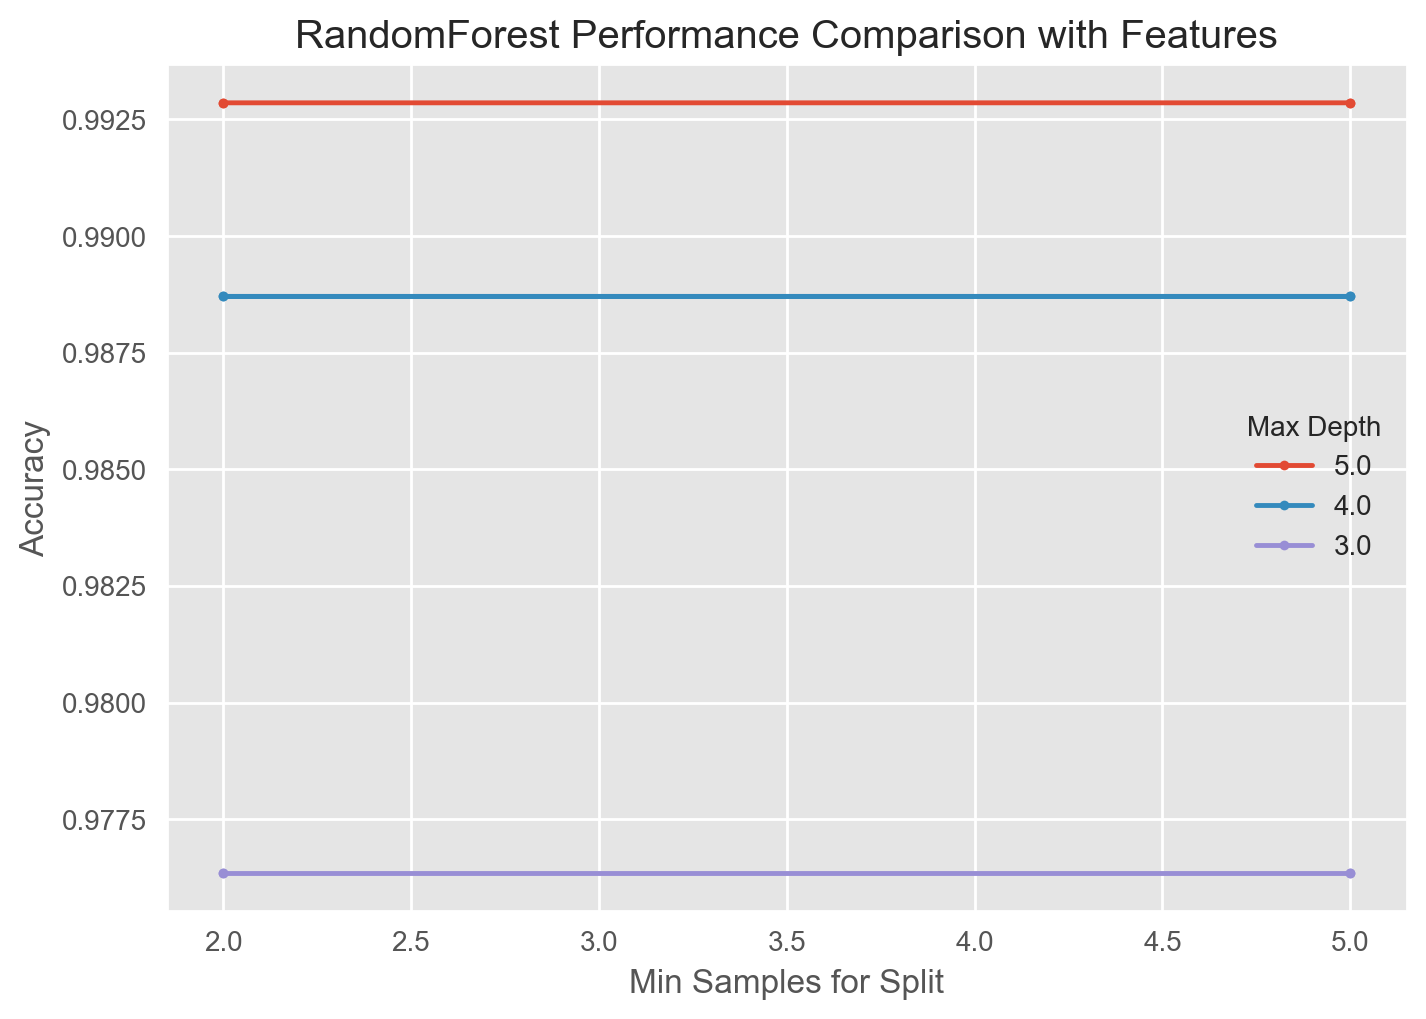

In [43]:
#plots
results_RF = search_results(gs_pipe_RF)
results_RF_10_features = results_RF[results_RF['rfi_fs__n_features_'] == 10.0]


for i in results_RF_10_features['RF__max_depth'].unique():
    temp = results_RF_10_features[results_RF_10_features['RF__max_depth'] == i]
    plt.plot(temp['RF__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("Accuracy")
plt.title("RandomForest Performance Comparison with Features")
plt.show()


#### Hyperparameter tuning for RandomForest

In [45]:
#Further fine tuning
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

pipe_RF2 = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('RF', RandomForestRegressor(random_state=111))])

params_pipe_RF2 = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'RF__max_depth': [15, 5, 10],
                  'RF__min_samples_split': [3, 8]}

gs_pipe_RF2 = GridSearchCV(estimator=pipe_RF, 
                          param_grid=params_pipe_RF, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-1,
                          verbose=1) 

gs_pipe_RF2.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [46]:
gs_pipe_RF2.best_params_

{'RF__max_depth': 5, 'RF__min_samples_split': 2, 'rfi_fs__n_features_': 10}

In [47]:
gs_pipe_RF2.best_score_

0.9928552407746783

Even after tuning the parameters, we are getting similar results. Let us try a different algorithm to check if the results match up.

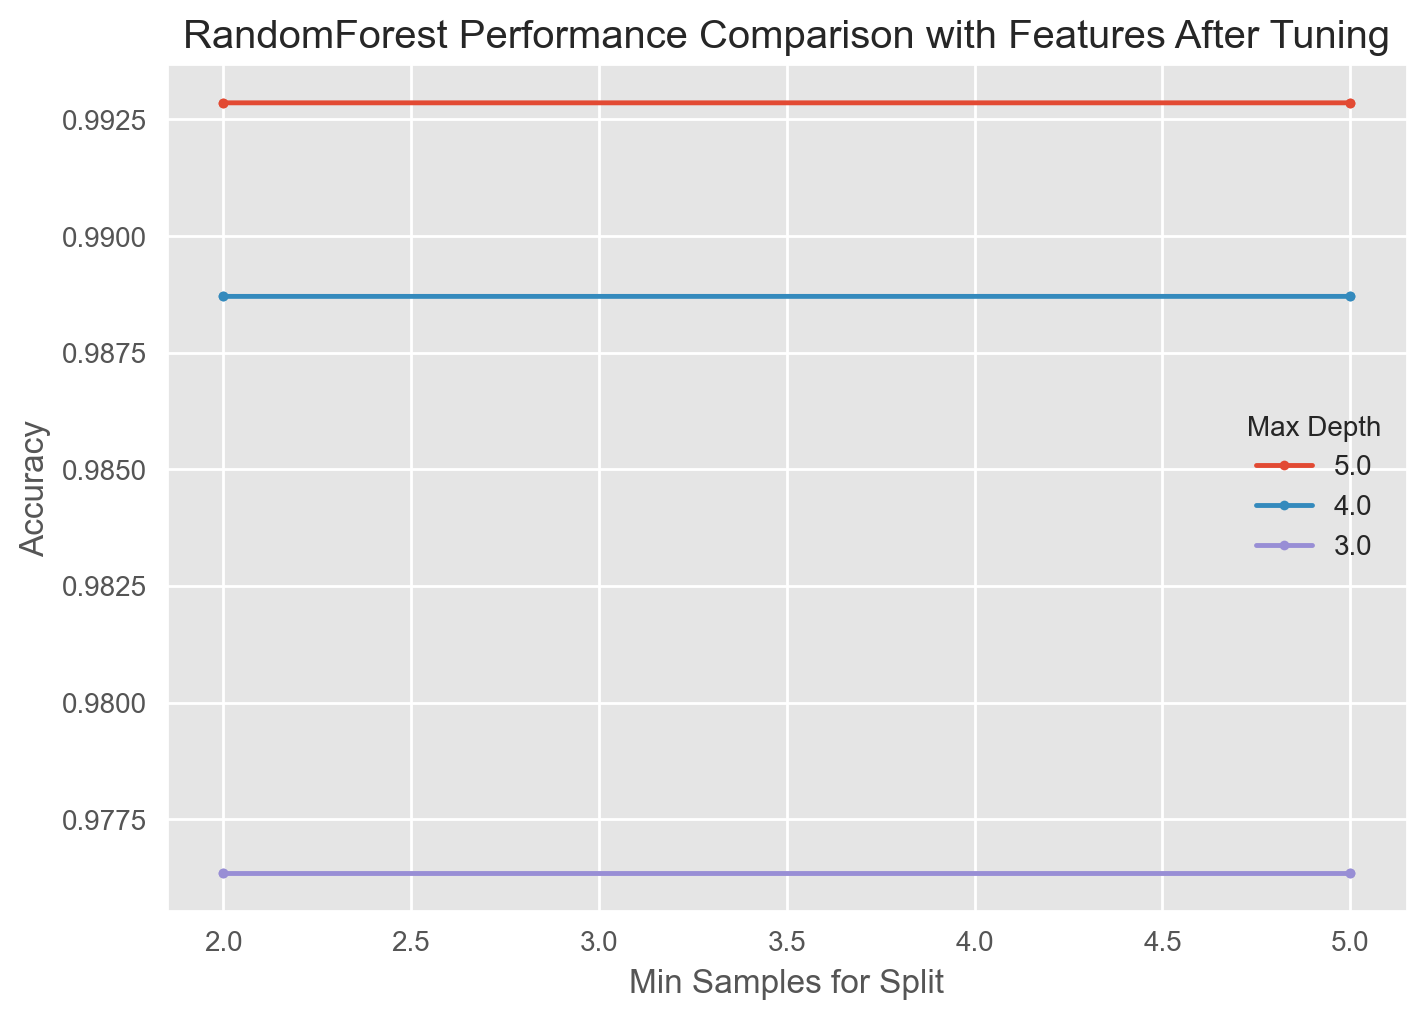

In [49]:
#Plots
results_RF2 = search_results(gs_pipe_RF2)
results_RF_10_features2 = results_RF2[results_RF2['rfi_fs__n_features_'] == 10.0]


for i in results_RF_10_features2['RF__max_depth'].unique():
    temp = results_RF_10_features2[results_RF_10_features2['RF__max_depth'] == i]
    plt.plot(temp['RF__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("Accuracy")
plt.title("RandomForest Performance Comparison with Features After Tuning")
plt.show()

#### Decision Tree Algorithm and Fine tuning the hyperparameters
We first get the base results by setting a few parameters and then move on to the hyperparameter tuning for the improved results.

In [51]:
from sklearn.tree import DecisionTreeRegressor

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeRegressor(random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          verbose=1) 

gs_pipe_DT.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [52]:
gs_pipe_DT.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 2, 'rfi_fs__n_features_': 10}

In [53]:
gs_pipe_DT.best_score_

0.9896009916339338

We can observe similar results when compared to the other algorithms.

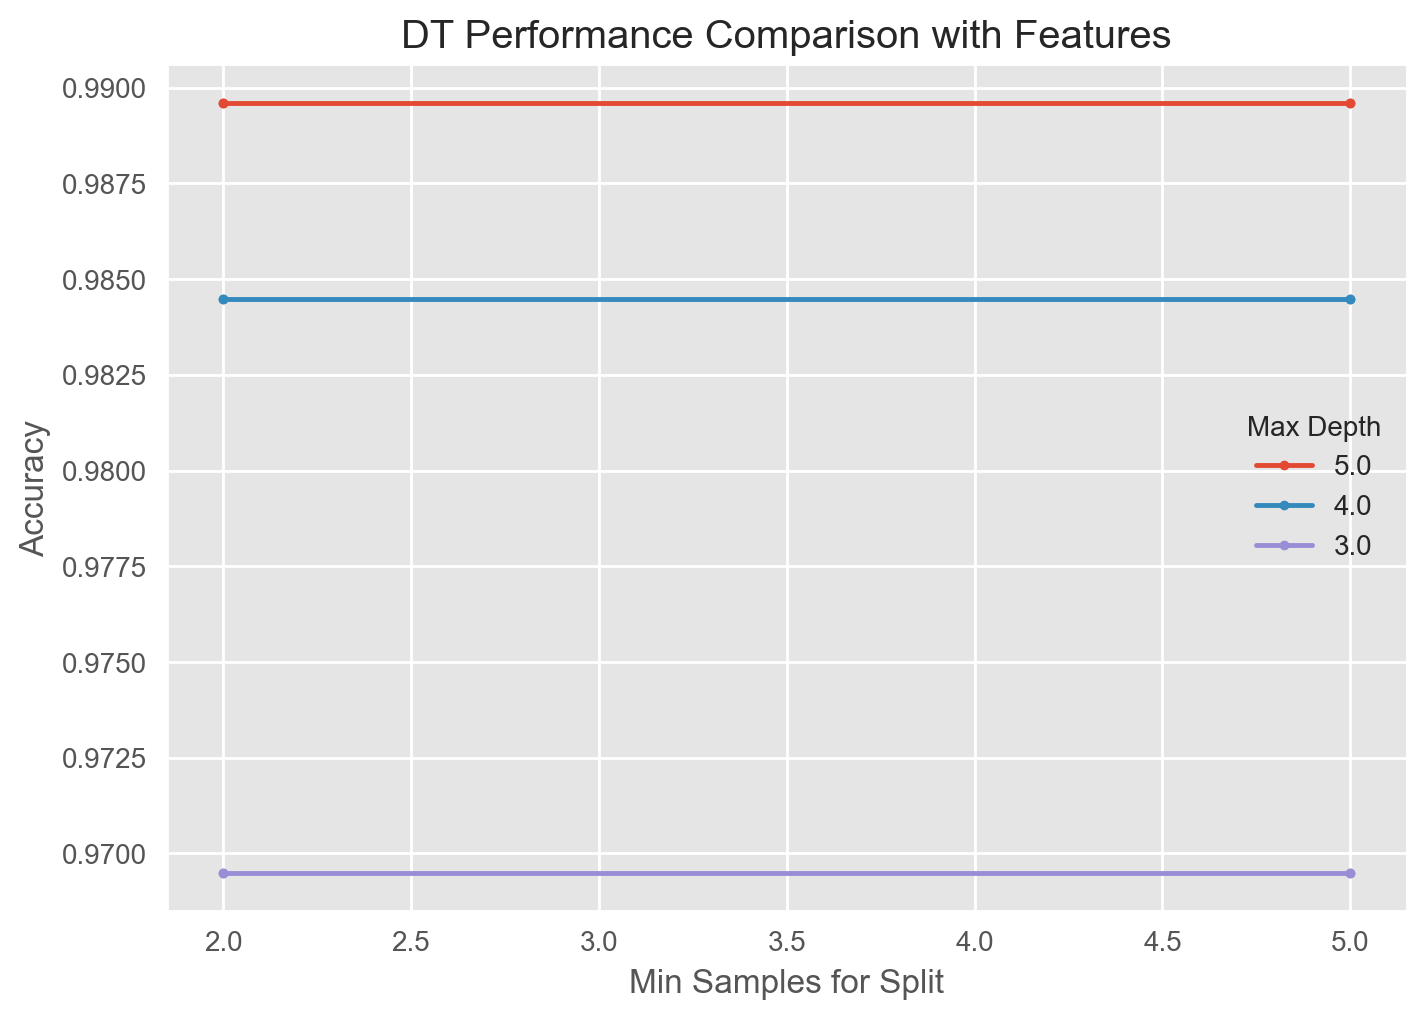

In [55]:
results_DT = search_results(gs_pipe_DT)
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]


for i in results_DT_10_features['dt__max_depth'].unique():
    temp = results_DT_10_features[results_DT_10_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("Accuracy")
plt.title("DT Performance Comparison with Features")
plt.show()

#### Hyperparameter tuning

In [57]:
#Further fine tuning
params_pipe_DT2 = {'rfi_fs__n_features_': [10],
                  'dt__max_depth': [5, 15, 30],
                  'dt__min_samples_split': [5, 50, 100, 150, 200, 250]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          verbose=1) 

gs_pipe_DT2.fit(Data_sample_train, target_sample_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [58]:
gs_pipe_DT2.best_params_

{'dt__max_depth': 30, 'dt__min_samples_split': 5, 'rfi_fs__n_features_': 10}

In [59]:
gs_pipe_DT2.best_score_

0.9958666096980104

Similar results are obtained after fine tuning. Let us plot a graph for the same

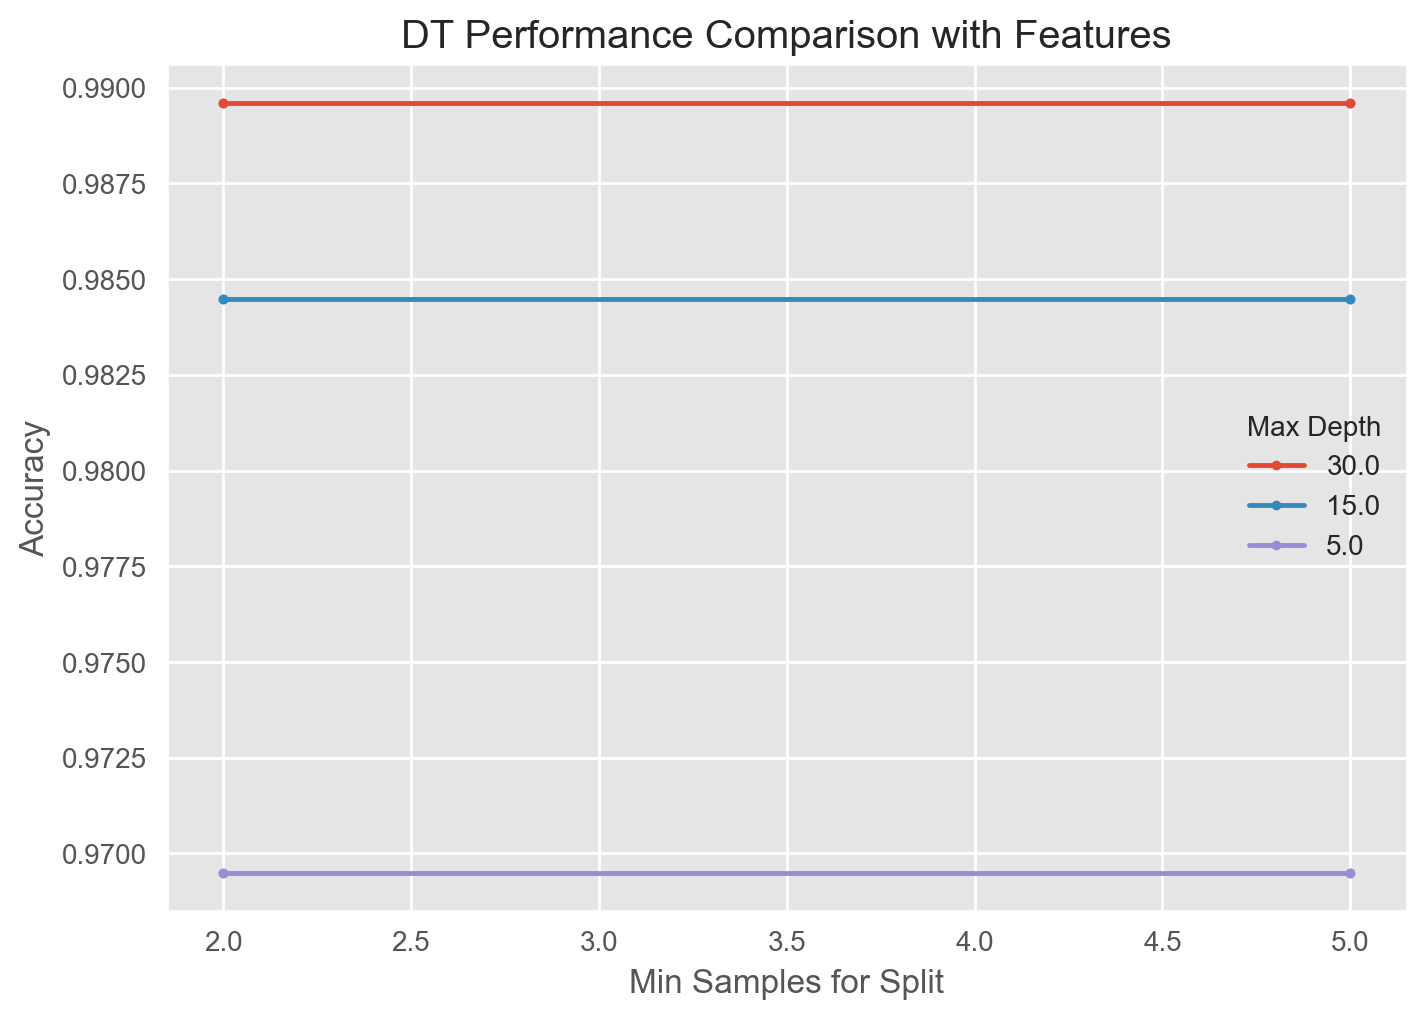

In [61]:
results_DT2 = search_results(gs_pipe_DT2)
results_DT_10_features2 = results_DT2[results_DT2['rfi_fs__n_features_'] == 10.0]


for i in results_DT_10_features2['dt__max_depth'].unique():
    temp = results_DT_10_features[results_DT_10_features2['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("Accuracy")
plt.title("DT Performance Comparison with Features")
plt.show()

### 2.3 Model Comparision
In this section we are using cross-val to judge the performace of our results

In [63]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = KFold(n_splits=10, shuffle=True, random_state=999)

randomforest_results = cross_val_score(estimator=gs_pipe_RF2.best_estimator_,
                                 X=Data_sample_test,
                                 y=target_sample_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-1)
randomforest_results.mean()

0.9928496316023411

In [64]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=Data_sample_test,
                                y=target_sample_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2)
cv_results_DT.mean()

0.9942545925488473

In [65]:
#Preds
pred_linear = linearmodel.predict(Data_sample_test)
#Data_test_transformed = PowerTransformer().fit_transform(Data_sample_test)
pred_RF = gs_pipe_RF2.predict(Data_sample_test)
pred_DT = gs_pipe_DT2.predict(Data_sample_test)

In [66]:
print('Accuracy of the linear regression model:')
linearmodel.score(Data_sample_test, target_sample_test)

Accuracy of the linear regression model:


0.9984109473257429

In [67]:
print('Accuracy of the random forest model after hyperparameter tuning')
gs_pipe_RF2.score(Data_sample_test, target_sample_test)

Accuracy of the random forest model after hyperparameter tuning


0.9928406510826648

In [68]:
print('Accuracy of the decision tree model after hyperparameter tuning')
gs_pipe_DT2.score(Data_sample_test, target_sample_test)

Accuracy of the decision tree model after hyperparameter tuning


0.9964827132891031

### 3. Critique and Limitations
The model accuracy is more or less 99% for all the algorithms used for this project. This can be due to overfitting. However, if we deep dive into the dataset itself, we can see that most of the values are similar and therefore we are getting such results. 

For the Linear Regression, we could use more of the parameters for tunining in the future to get a better performance from the model. Same can be said for the Random Forest and Decision Tree algorithms. This approch towards the dataset was more accuracy foccused. It may not yeild reliable results all the time. For the Random Forest and Decision Tree algorithms, only a few parameters were used for tuning. In the future, we will try to use more or all the parameters availaable to make the solution better.

### 4. Summary and Conclusions

#### 4.1 Summary For Both Phases Of The Project
I started the Phase 1 by reading up about the dataset and how the parameters affect teh performancee of the target variable in real life. This was done to get a better understanding of what I was doing so that I could take during the project which would make sense to the end user. 

Pre processing the data was done in Phase 1. I checked all the null values, missing values, and duplicates that might affect the final performance of the model in Phase 2. Phase 1 also had a lot of exploratory data analysis which was done using univariate and bi-variate charts. I could get a good look at all the distributions of the features and decide which variable to use as the target variable. A heatmap gave interesting outputs as I could see the correlation of the target variable with the other variables in teh dataset. This helped further on in the feature selection for Phase 2 of the project.

Phase 2 of the project was all about modelling, predicting, and scaling the dataset features to predict the target variable accurately. Very interestingly, I saw that all my results were around the 99% accuracy rate which is highly unlikely in the real world. Deep diving furhter into the dataset, I could see that the target variable TEY had very less difference between each row and maybe that was the reason for my results. 

For the modelling, I have used Linear Regression, Random Forest, and Decision Tree algorithms to predict the target variable. Feature selection and ranking was done using a class which uses RandomForestRegressor. The results obtained from this step tallied with what I had got from the heatmap in Phase 1 of the project. The important parameters were used in the pipeline which helped streamline the whole code. The results remained very similar even after the tuning. Overall the Decision Tree algorithm gave the highest acuuracy. In the future, other parameters can be tuned and explored to make the result better.

#### 4.2 Summary of Findings
The primary aim of this project was to predict the TEY values after training the dataset with 3 different algorithms. The Decision Tree algorithm yeilded the best results among the 3 algorithms that were used for this project. 

The heatmap from Phase 1 and the feature selection and ranking from Phase 2 had similar results which gave the assurance that the project was going in the right direction. The dataset was cleaned for the tasks to be implemented in Phase 2 of the project. Since the target variable had very littel difference between its rows, we could see an exceptionally high accuracy rate. This is not achievable with other datasets. The dataset had about 7000 rows, out of which only 5000 rows were used for this project. The test split was 30% and all the models were able to yeild high accuracies with the predicted values.

#### 4.3 Conclusion
To conclude, the dataset was cleaned and prepared for the tasks in Phase 2 of the project. 3 models were used for the predictions: Linear Regression, Random Forrest, and Decision Trees. The Decision Tree algorithm had the best results among all the other algorithms after the parameter tuning was done. Since this was a regression based problem, the use of XGBoost algorithm could also be used. This implementation might happen in the future. Overall it was a very interesting datset to play with and get results from. 

## 5. References
Heysem Kaya.Gas Turbine CO and NOx Emission Data Set Data Set.Retrieved April 8, 2021 from https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set

In [99]:
!git init


Initialized empty Git repository in C:/Users/asus pc/ml gas project/Phase 2/.git/


In [105]:
git remote add origin https://github.com/astroidDestroyer/gas-turbine-emission-detector.git


SyntaxError: invalid syntax (2994453297.py, line 1)

In [ ]:
!git add .
!git commit -m "Initial commit"
!git push -u origin main


In [106]:
!git remote add origin https://github.com/astroidDestroyer/gas-turbine-emission-detector.git